In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
import pickle
import warnings
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
try:
    plt.style.use('paper')
except:
    pass
%matplotlib inline

In [5]:
repopath = '/mnt/ssd/workspace/stability/MLstability/'

In [17]:
modelfiles = ['orbsummaryfeaturesxgb_random.pkl', 'orbsummaryfeaturesxgb_resonant.pkl', 'ressummaryfeaturesxgb_random.pkl', 'ressummaryfeaturesxgb_resonant.pkl']


In [21]:
modelfile = 'ressummaryfeaturesxgb_random.pkl'
model, features = pickle.load(open(repopath+"models/"+modelfile, 'rb'))

In [22]:
features

array(['Zcross12', 'Zcross13', 'Zcross23', 'maxj', 'maxk', 'maxi1',
       'maxi2', 'maxstrength', 'secondres', 'EMmed12', 'EMmax12',
       'EMdrift12', 'capseculartscale12', 'EMdetrendedstd12',
       'EMrollingstd12', 'DiffcoeffEM12', 'medvarEM12', 'Zmed12',
       'Zmax12', 'Zdetrendedstd12', 'Zrollingstd12', 'DiffcoeffZ12',
       'medvarZ12', 'Zcomdrift12', 'Zcomrollingstd12', 'phiZcomdrift12',
       'phiZcomrollingstd12', 'Zstardrift12', 'Zstarrollingstd12',
       'Zcosphistd12', 'medZcosphi12', 'EMmed23', 'EMmax23', 'EMdrift23',
       'capseculartscale23', 'EMdetrendedstd23', 'EMrollingstd23',
       'DiffcoeffEM23', 'medvarEM23', 'Zmed23', 'Zmax23',
       'Zdetrendedstd23', 'Zrollingstd23', 'DiffcoeffZ23', 'medvarZ23',
       'Zcomdrift23', 'Zcomrollingstd23', 'phiZcomdrift23',
       'phiZcomrollingstd23', 'Zstardrift23', 'Zstarrollingstd23',
       'Zcosphistd23', 'medZcosphi23', 'tlyap'], dtype=object)

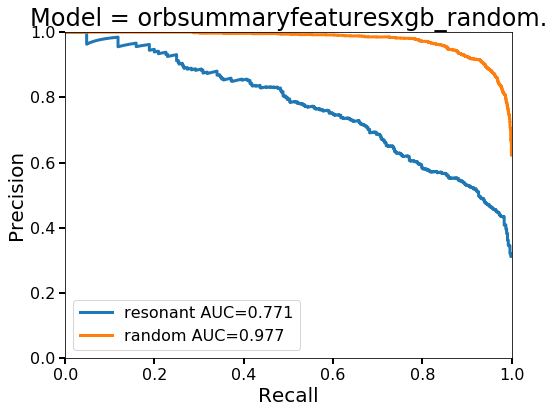

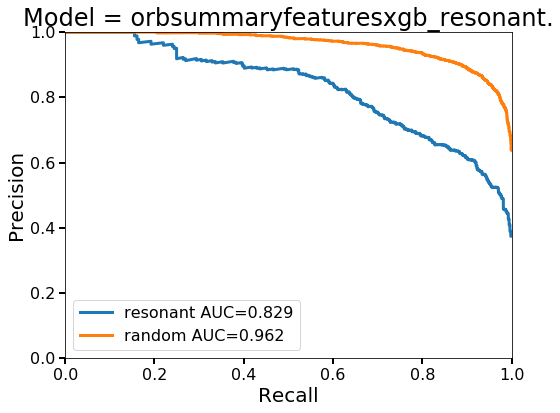

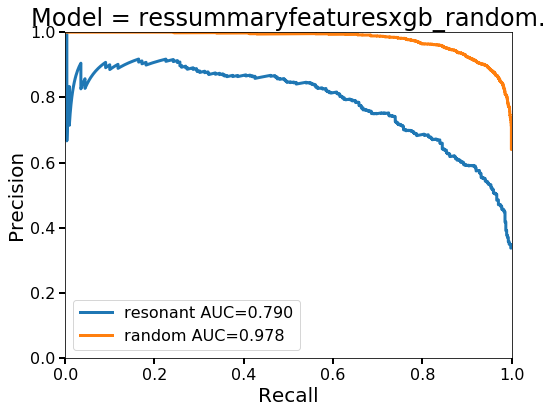

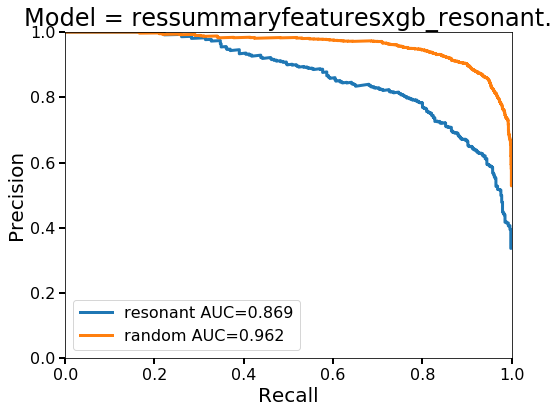

In [24]:
for modelfile in modelfiles:
    model, features = pickle.load(open(repopath+"models/"+modelfile, 'rb'))

    systems = ['resonant', 'random']
    fig, ax = plt.subplots(figsize=(8,6))

    for system in systems:
        if 'orbsummary' in modelfile:
            trainfolder = '/orbsummaryfeaturesxgbNorbits10000.0Nout1000window10/'
        if 'ressummary' in modelfile:
            trainfolder = '/ressummaryfeaturesxgbNorbits10000.0Nout1000/'
        trainpath = repopath+'training_data/' + system + trainfolder
        tdata = pd.read_csv(trainpath + 'trainingdata.csv', index_col=0)
        labels = pd.read_csv(repopath+'training_data/' + system + trainfolder + 'labels.csv', index_col=0)
        y = labels['Stable']
        X = tdata[features]
        Nrows = int(0.8*X.shape[0])

        testX = X.iloc[Nrows:, :]
        testY = y.iloc[Nrows:]
        preds = model.predict_proba(testX)[:,1] 
        precision, recall, thresholds = precision_recall_curve(testY, preds)
        ax.plot(recall, precision, label='{0} AUC={1:.3f}'.format(system, metrics.average_precision_score(testY, preds)))

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title('Model = '+modelfile[:-3])
    ax.legend()